## Pandas: access to the remote json from MongoDB
- The json file is generated on the fly from the express server of Node.js.
- The data stored in MongoDB are saved in the json file.
- The data are composed of three time series; temperature, humidity, and luminosity.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

## [데이터 로드 1.]
- loading real-time json file from MongoDB via web

- http://chaos.inje.ac.kr:3030/client_33.html

In [2]:
# loading real-time json file from MongoDB via web (CORS, port=3030)
url="http://chaos.inje.ac.kr:3030/iot"
df=pd.read_json(url)
print('Large IoT data was retrieved successfully from MongoDB!')

Large IoT data was retrieved successfully from MongoDB!


## [데이터 로드 2.]
- Load the compressed data from github.com

In [3]:
df.head()

,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
0,6372dced4ae845251c1cd863,2022-11-15 09:27:25.144,27.9,26.5,376,1008.4,37.6,33.3,29.1,0
1,6372dcf24ae845251c1cd864,2022-11-15 09:27:30.188,27.9,26.6,374,1008.6,37.7,33.3,29.1,0
2,6372dcf74ae845251c1cd865,2022-11-15 09:27:35.232,28.0,26.6,373,1008.5,37.7,33.3,29.1,0
3,6372dcfc4ae845251c1cd866,2022-11-15 09:27:40.277,27.9,26.6,374,1008.5,37.6,33.2,29.2,0
4,6372dd014ae845251c1cd867,2022-11-15 09:27:45.322,27.9,26.6,373,1008.4,37.7,33.3,29.1,0


In [4]:
df.tail()

,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
39020,6375ddc64ae845251c1d70cf,2022-11-17 16:07:50.279,26.5,28.7,8,1014.0,33.3,33.3,33.3,0
39021,6375ddcb4ae845251c1d70d0,2022-11-17 16:07:55.323,26.5,28.8,8,1014.1,33.3,33.3,33.3,0
39022,6375ddd04ae845251c1d70d1,2022-11-17 16:08:00.368,26.4,28.8,8,1014.0,33.3,33.3,33.3,0
39023,6375ddd54ae845251c1d70d2,2022-11-17 16:08:05.412,26.4,28.8,8,1014.0,33.3,33.3,33.3,0
39024,6375ddda4ae845251c1d70d3,2022-11-17 16:08:10.457,26.4,28.7,8,1013.9,33.3,33.3,33.3,0


In [5]:
df.shape, type(df)

((39025, 10), pandas.core.frame.DataFrame)

In [6]:
df['date'][:1],df['date'][-1:]

(0   2022-11-15 09:27:25.144
 Name: date, dtype: datetime64[ns], 39024   2022-11-17 16:08:10.457
 Name: date, dtype: datetime64[ns])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39025 entries, 0 to 39024
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          39025 non-null  object        
 1   date         39025 non-null  datetime64[ns]
 2   temperature  39025 non-null  float64       
 3   humidity     39025 non-null  float64       
 4   luminosity   39025 non-null  int64         
 5   pressure     39025 non-null  float64       
 6   r_ratio      19631 non-null  float64       
 7   g_ratio      19631 non-null  float64       
 8   b_ratio      19631 non-null  float64       
 9   __v          39025 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 3.0+ MB


In [8]:
df.describe()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
count,39025.000000,39025.000000,39025.000000,39025.000000,19631.000000,19631.000000,19631.000000,39025.0
mean,26.585181,29.306957,84.522742,1011.169714,34.085314,33.753640,32.156492,0.0
std,0.920378,1.475688,150.066528,2.430571,4.204384,2.285432,4.775656,0.0
min,24.900000,24.600000,0.000000,1006.000000,0.000000,0.000000,26.200000,0.0
25%,25.900000,28.100000,0.000000,1009.800000,31.600000,33.100000,29.300000,0.0
50%,26.400000,29.900000,2.000000,1011.000000,33.300000,33.300000,31.700000,0.0
75%,26.800000,30.500000,60.000000,1013.200000,37.500000,34.800000,34.500000,0.0
max,29.300000,31.500000,661.000000,1016.000000,50.000000,50.000000,100.000000,0.0


In [9]:
# Save iot data in csv file.
df.to_csv('iot33_data_221117_raw.csv')

## Check data
- NaN
- missing value

In [10]:
df.isnull().sum() #/df.shape[0]*100

_id                0
date               0
temperature        0
humidity           0
luminosity         0
pressure           0
r_ratio        19394
g_ratio        19394
b_ratio        19394
__v                0
dtype: int64

In [11]:
df.isna().sum()

_id                0
date               0
temperature        0
humidity           0
luminosity         0
pressure           0
r_ratio        19394
g_ratio        19394
b_ratio        19394
__v                0
dtype: int64

## Replace NaN with mean: Imputation
- NaN ==>> 33.3 (100/3)

In [12]:
df=df.fillna(33.3)
df.isna().sum()

_id            0
date           0
temperature    0
humidity       0
luminosity     0
pressure       0
r_ratio        0
g_ratio        0
b_ratio        0
__v            0
dtype: int64

In [13]:
# for whole dataframe
# df = df.replace(np.nan, 33.3)
df.isnull().sum()

_id            0
date           0
temperature    0
humidity       0
luminosity     0
pressure       0
r_ratio        0
g_ratio        0
b_ratio        0
__v            0
dtype: int64

## IoT data were cleaned!

In [18]:
# Save cleaned iot data in csv file.
df.to_csv('iot33_data_221117_clean.csv')

In [17]:
df.head()

,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
0,6372dced4ae845251c1cd863,2022-11-15 09:27:25.144,27.9,26.5,376,1008.4,37.6,33.3,29.1,0
1,6372dcf24ae845251c1cd864,2022-11-15 09:27:30.188,27.9,26.6,374,1008.6,37.7,33.3,29.1,0
2,6372dcf74ae845251c1cd865,2022-11-15 09:27:35.232,28.0,26.6,373,1008.5,37.7,33.3,29.1,0
3,6372dcfc4ae845251c1cd866,2022-11-15 09:27:40.277,27.9,26.6,374,1008.5,37.6,33.2,29.2,0
4,6372dd014ae845251c1cd867,2022-11-15 09:27:45.322,27.9,26.6,373,1008.4,37.7,33.3,29.1,0


## New DataFrame : iot_data
### Dataframe with date and sensor values(temperature, humidity, luminosity, pressure, r, g, b)

In [23]:
df.columns

Index(['_id', 'date', 'temperature', 'humidity', 'luminosity', 'pressure',
       'r_ratio', 'g_ratio', 'b_ratio', '__v'],
      dtype='object')

In [19]:
#  select columns
cols = ['date', 'temperature', 'humidity', 'luminosity', 'pressure', 'r_ratio', 'g_ratio', 'b_ratio']

In [20]:
# Make iot data
iot_data = df[cols]

In [21]:
iot_data.shape

(39025, 8)

In [22]:
iot_data.head()  # date와 7 개의 신호를 확인.

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2022-11-15 09:27:25.144,27.9,26.5,376,1008.4,37.6,33.3,29.1
1,2022-11-15 09:27:30.188,27.9,26.6,374,1008.6,37.7,33.3,29.1
2,2022-11-15 09:27:35.232,28.0,26.6,373,1008.5,37.7,33.3,29.1
3,2022-11-15 09:27:40.277,27.9,26.6,374,1008.5,37.6,33.2,29.2
4,2022-11-15 09:27:45.322,27.9,26.6,373,1008.4,37.7,33.3,29.1


In [24]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39025 entries, 0 to 39024
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         39025 non-null  datetime64[ns]
 1   temperature  39025 non-null  float64       
 2   humidity     39025 non-null  float64       
 3   luminosity   39025 non-null  int64         
 4   pressure     39025 non-null  float64       
 5   r_ratio      39025 non-null  float64       
 6   g_ratio      39025 non-null  float64       
 7   b_ratio      39025 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 2.4 MB


In [25]:
iot_data.isna().sum()

date           0
temperature    0
humidity       0
luminosity     0
pressure       0
r_ratio        0
g_ratio        0
b_ratio        0
dtype: int64

In [26]:
# Save iot data in csv file.
iot_data.to_csv('iot_nano33_211123_clean.csv')

## EDA (Exploratory Data Analysis, 탐색적 자료 분석) 

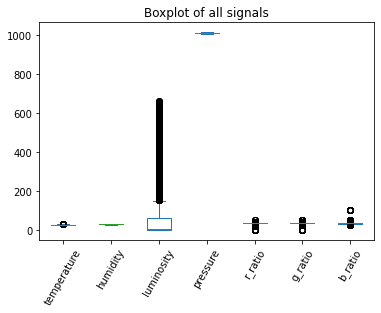

In [27]:
# Plot boxplot
# iot_data[['temperature','humidity','luminosity']].plot.box(title='Boxplot of temperature, humidity, and luminosity')
# iot_data.loc[:,'temperature':'luminosity'].plot.box(title='Boxplot of temperature, humidity, and luminosity')
iot_data.iloc[:,1:].plot.box(title='Boxplot of all signals')
plt.xticks(rotation=60)
plt.show()

### Plot time series of sensor data

In [28]:
iot_data.head()

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2022-11-15 09:27:25.144,27.9,26.5,376,1008.4,37.6,33.3,29.1
1,2022-11-15 09:27:30.188,27.9,26.6,374,1008.6,37.7,33.3,29.1
2,2022-11-15 09:27:35.232,28.0,26.6,373,1008.5,37.7,33.3,29.1
3,2022-11-15 09:27:40.277,27.9,26.6,374,1008.5,37.6,33.2,29.2
4,2022-11-15 09:27:45.322,27.9,26.6,373,1008.4,37.7,33.3,29.1


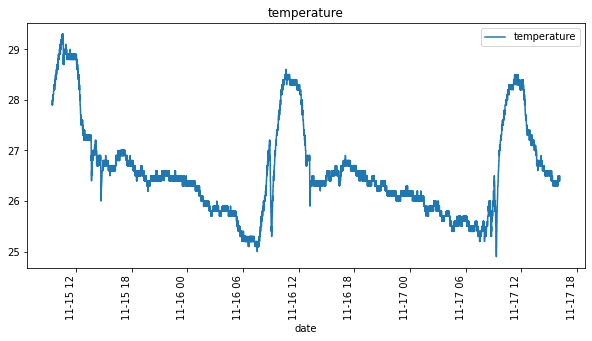

In [29]:
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=90)
plt.show()

### Set style of graph
- plt.style.use('fivethirtyeight')
- plt.style.use('ggplot')

In [30]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

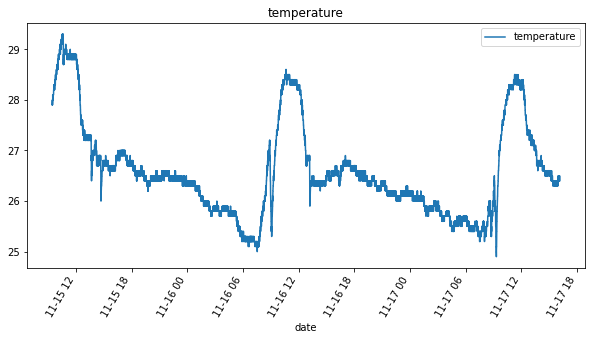

In [31]:
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=60)
plt.style.use('seaborn-pastel') # 'seaborn-pastel', 'fivethirtyeight'
plt.show()

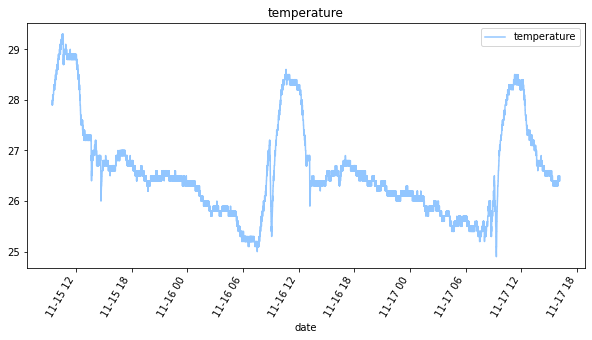

In [32]:
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=60)
plt.style.use('ggplot')
plt.show()

In [33]:
# restore default style
plt.style.use('default')

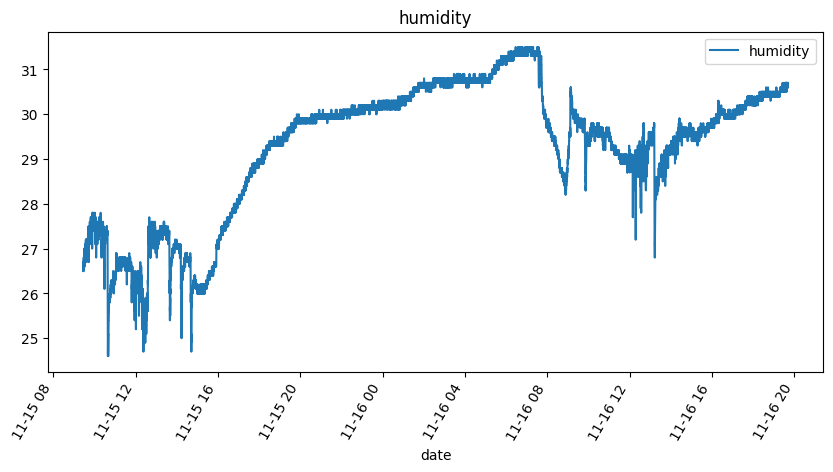

In [ ]:
iot_data.plot(x='date', y='humidity', figsize=(10,5), title='humidity')
plt.xticks(rotation=60)
plt.show()

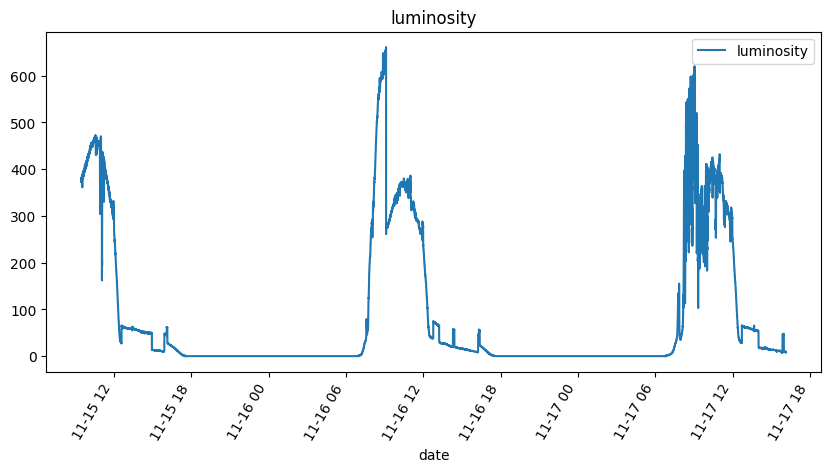

In [34]:
iot_data.plot(x='date', y='luminosity', figsize=(10,5), title='luminosity')
plt.xticks(rotation=60)
plt.show()

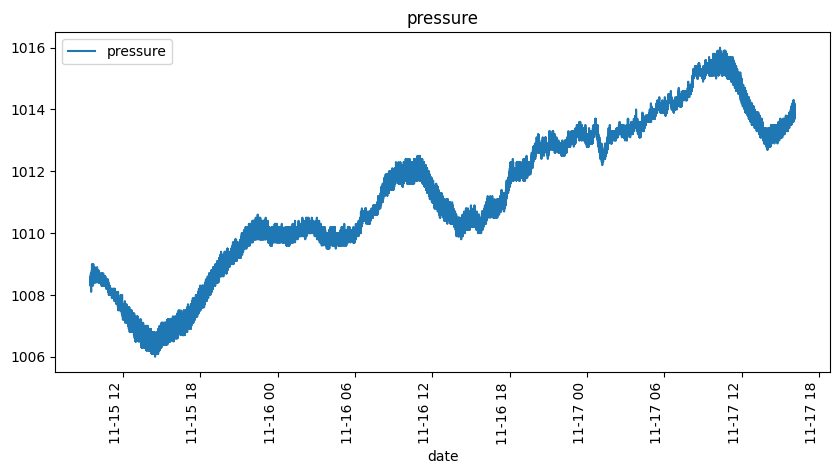

In [35]:
iot_data.plot(x='date', y='pressure', figsize=(10,5), title='pressure')
plt.xticks(rotation=90)
plt.show()

#### 다중그래프 (multiple graphs)

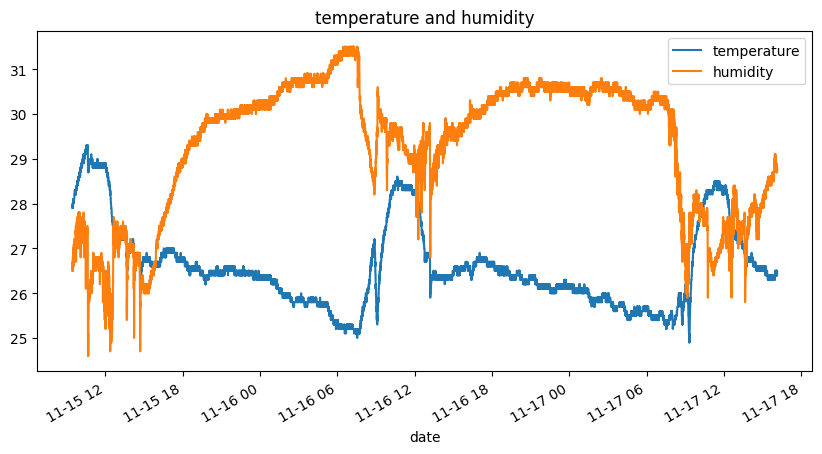

In [36]:
# Plot of ['temperature','humidity']
iot_data.plot(x='date', y=['temperature','humidity'], figsize=(10,5), title='temperature and humidity')

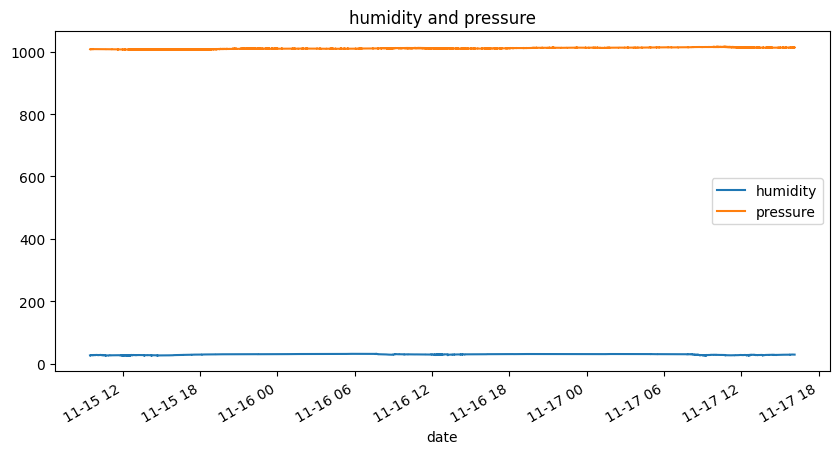

In [37]:
# Plot of ['humidity', 'pressure']
iot_data.plot(x='date', y=['humidity','pressure'], figsize=(10,5), title='humidity and pressure')
# ax = iot_data.plot(x='date', y=['humidity'], figsize=(10,5), title='humidity and pressure')
# iot_data.plot(x='date', y=['pressure'], figsize=(10,5), secondary_y=True, ax=ax)


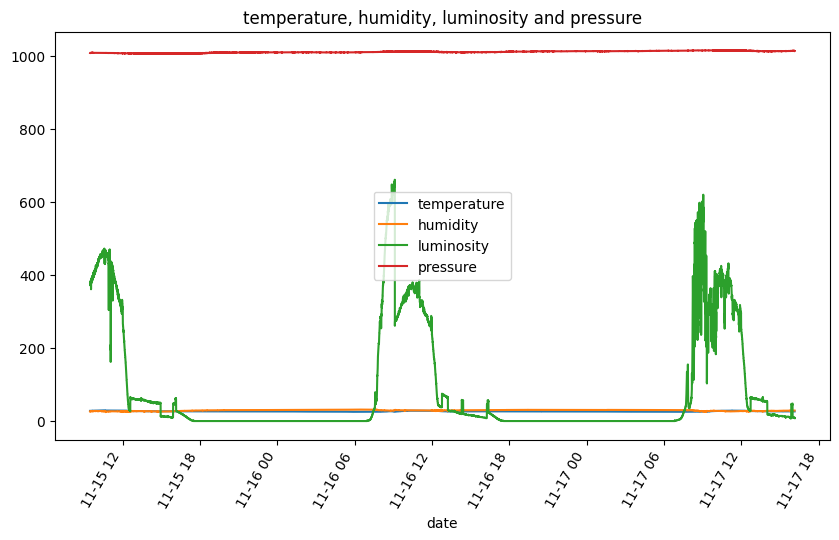

In [38]:
# Plot of ['temperature','humidity','luminosity','pressure']
iot_data.plot(x='date', y=['temperature','humidity','luminosity','pressure'], figsize=(10,6), 
             title='temperature, humidity, luminosity and pressure')
plt.xticks(rotation=60)
plt.show()

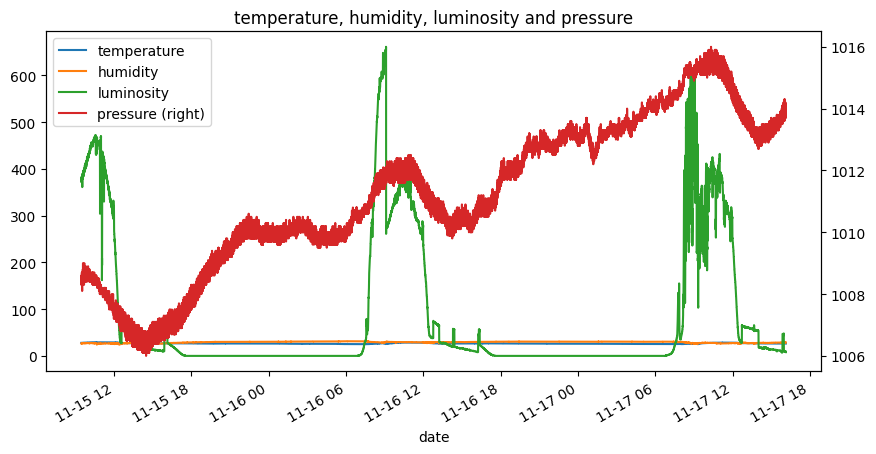

In [39]:
# Plot of ['temperature','humidity','luminosity','pressure']
ax = iot_data.plot(x='date', y=['temperature','humidity','luminosity'], figsize=(10,6), 
             title='temperature, humidity, luminosity and pressure')
iot_data.plot(x='date', y=['pressure'], figsize=(10,5), secondary_y=True, ax=ax)
plt.xticks(rotation=60)
plt.show()

#### Plot the mean of sensor data

In [40]:
iot_data[['temperature','humidity','luminosity']].mean()  

temperature    26.585181
humidity       29.306957
luminosity     84.522742
dtype: float64

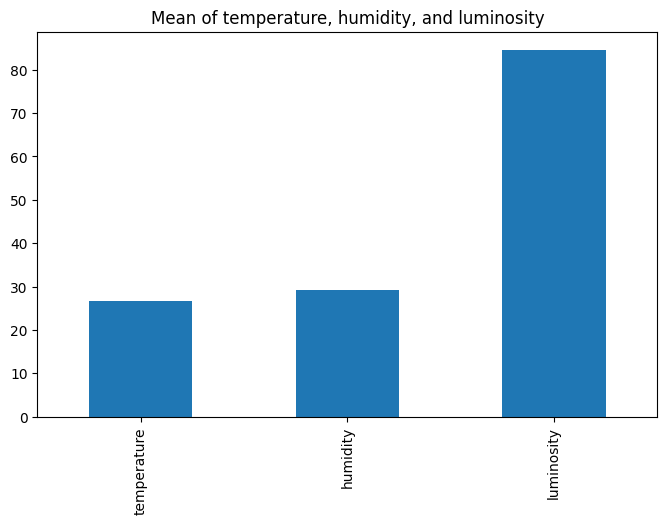

In [41]:
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(8,5), 
                                                                  title="Mean of temperature, humidity, and luminosity")

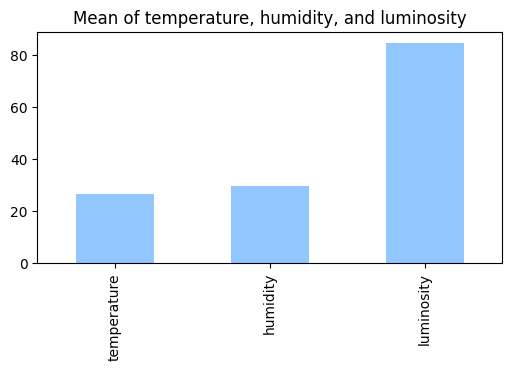

In [42]:
plt.style.use('seaborn-pastel')   # fivethirtyeight, ggplot
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(6,3), 
                                                                  title="Mean of temperature, humidity, and luminosity")

# Advanced graphics using pandas

### Plot the change of sensor data over various time spans.

> time span: 60 sec, 1 hour, 1 day, 1 week

In [43]:
iot_data.head()

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2022-11-15 09:27:25.144,27.9,26.5,376,1008.4,37.6,33.3,29.1
1,2022-11-15 09:27:30.188,27.9,26.6,374,1008.6,37.7,33.3,29.1
2,2022-11-15 09:27:35.232,28.0,26.6,373,1008.5,37.7,33.3,29.1
3,2022-11-15 09:27:40.277,27.9,26.6,374,1008.5,37.6,33.2,29.2
4,2022-11-15 09:27:45.322,27.9,26.6,373,1008.4,37.7,33.3,29.1


#### Set date as index of timestamp

In [44]:
iot_data.set_index('date',inplace=True)

In [45]:
iot_data.head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2022-11-15 09:27:25.144,27.9,26.5,376,1008.4,37.6,33.3,29.1
2022-11-15 09:27:30.188,27.9,26.6,374,1008.6,37.7,33.3,29.1
2022-11-15 09:27:35.232,28.0,26.6,373,1008.5,37.7,33.3,29.1
2022-11-15 09:27:40.277,27.9,26.6,374,1008.5,37.6,33.2,29.2
2022-11-15 09:27:45.322,27.9,26.6,373,1008.4,37.7,33.3,29.1


In [46]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39025 entries, 2022-11-15 09:27:25.144000 to 2022-11-17 16:08:10.457000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  39025 non-null  float64
 1   humidity     39025 non-null  float64
 2   luminosity   39025 non-null  int64  
 3   pressure     39025 non-null  float64
 4   r_ratio      39025 non-null  float64
 5   g_ratio      39025 non-null  float64
 6   b_ratio      39025 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.4 MB


In [47]:
# Convert date index to Datetime index, 중요!!!
iot_data.index = pd.to_datetime(iot_data.index)

In [48]:
iot_data.info() # Range index -> timestamp(Datetime) index 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39025 entries, 2022-11-15 09:27:25.144000 to 2022-11-17 16:08:10.457000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  39025 non-null  float64
 1   humidity     39025 non-null  float64
 2   luminosity   39025 non-null  int64  
 3   pressure     39025 non-null  float64
 4   r_ratio      39025 non-null  float64
 5   g_ratio      39025 non-null  float64
 6   b_ratio      39025 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.4 MB


In [49]:
iot_data.head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2022-11-15 09:27:25.144,27.9,26.5,376,1008.4,37.6,33.3,29.1
2022-11-15 09:27:30.188,27.9,26.6,374,1008.6,37.7,33.3,29.1
2022-11-15 09:27:35.232,28.0,26.6,373,1008.5,37.7,33.3,29.1
2022-11-15 09:27:40.277,27.9,26.6,374,1008.5,37.6,33.2,29.2
2022-11-15 09:27:45.322,27.9,26.6,373,1008.4,37.7,33.3,29.1


In [50]:
# Estimate the mean of the iot data for every minute
iot_data.resample('60S').mean()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2022-11-15 09:27:00,27.928571,26.571429,373.428571,1008.471429,37.642857,33.257143,29.142857
2022-11-15 09:28:00,27.975000,26.625000,376.333333,1008.391667,37.625000,33.233333,29.166667
2022-11-15 09:29:00,28.000000,26.783333,378.666667,1008.408333,37.600000,33.275000,29.133333
2022-11-15 09:30:00,28.025000,26.783333,380.333333,1008.425000,37.633333,33.233333,29.175000
2022-11-15 09:31:00,28.050000,26.733333,380.833333,1008.375000,37.600000,33.208333,29.216667
...,...,...,...,...,...,...,...
2022-11-17 16:04:00,26.475000,28.800000,10.000000,1013.875000,33.300000,33.300000,33.300000
2022-11-17 16:05:00,26.466667,28.800000,10.000000,1013.875000,33.300000,33.300000,33.300000
2022-11-17 16:06:00,26.450000,28.766667,10.000000,1013.916667,31.800000,34.075000,34.075000


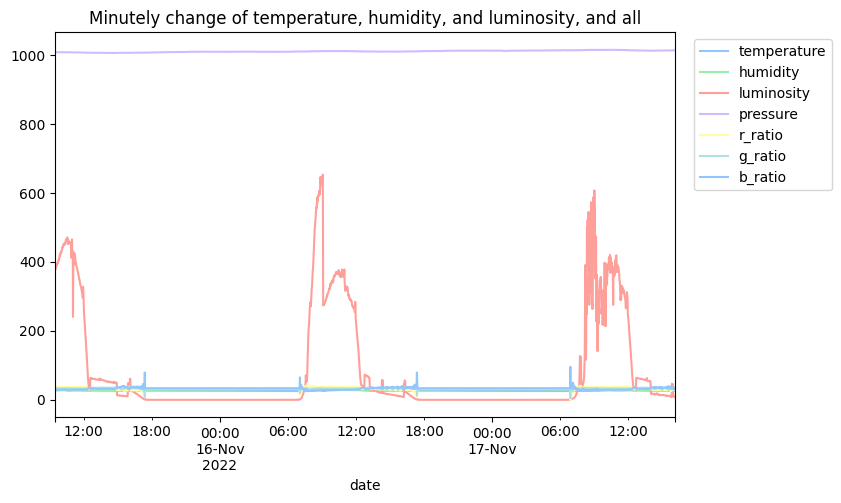

In [51]:
#  Plot mean of the iot data per every minute
iot_data.resample('60S').mean().plot(figsize=(8,5), 
                                     title='Minutely change of temperature, humidity, and luminosity, and all')
plt.legend(bbox_to_anchor=(1.02, 1.0))

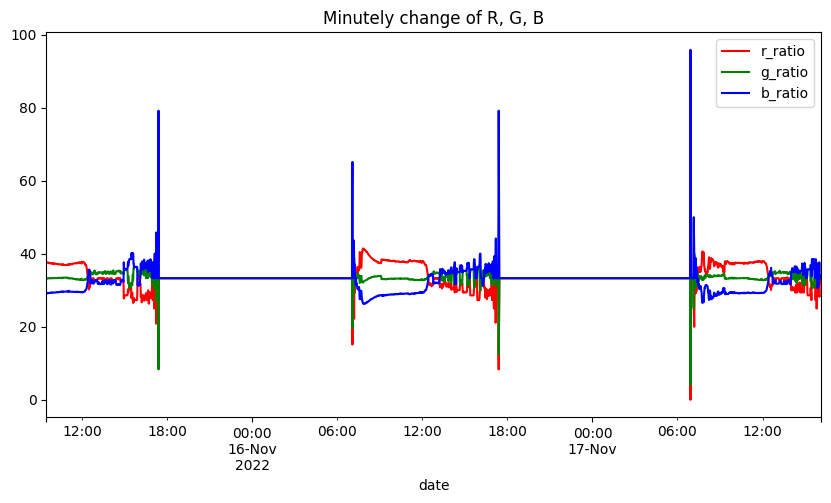

In [52]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('60S').mean().plot(figsize=(10,5), 
                                     title='Minutely change of R, G, B',
                                     color="rgb")

In [53]:
# Estimate the mean of iot data for every hour
iot_data.resample('H').mean()  # mean per each hour

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2022-11-15 09:00:00,28.321392,27.251804,400.471649,1008.570876,37.440722,33.288144,29.278866
2022-11-15 10:00:00,28.966527,26.852241,452.098039,1008.410644,37.071148,33.388515,29.538936
2022-11-15 11:00:00,28.858485,26.569986,361.927069,1007.861010,37.338008,33.104909,29.563114
2022-11-15 12:00:00,27.952241,26.429272,98.050420,1007.147899,34.167227,33.958543,31.855742
2022-11-15 13:00:00,27.102941,27.126611,57.732493,1006.651541,33.044118,34.786975,32.142717
2022-11-15 14:00:00,26.776157,26.500982,48.403927,1006.433520,32.604769,34.969986,32.401403
2022-11-15 15:00:00,26.696218,26.353922,15.358543,1006.753221,29.146359,34.233053,36.678291
2022-11-15 16:00:00,26.827630,27.615708,23.497896,1006.981066,28.959888,35.182609,35.861711
2022-11-15 17:00:00,26.834594,28.546779,2.002801,1007.445798,31.936555,32.790056,35.190196


In [54]:
iot_data.resample('H').mean().shape, iot_data.resample('H').mean().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2022-11-15 09:00:00 to 2022-11-17 16:00:00
Freq: H
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  56 non-null     float64
 1   humidity     56 non-null     float64
 2   luminosity   56 non-null     float64
 3   pressure     56 non-null     float64
 4   r_ratio      56 non-null     float64
 5   g_ratio      56 non-null     float64
 6   b_ratio      56 non-null     float64
dtypes: float64(7)
memory usage: 3.5 KB


((56, 7), None)

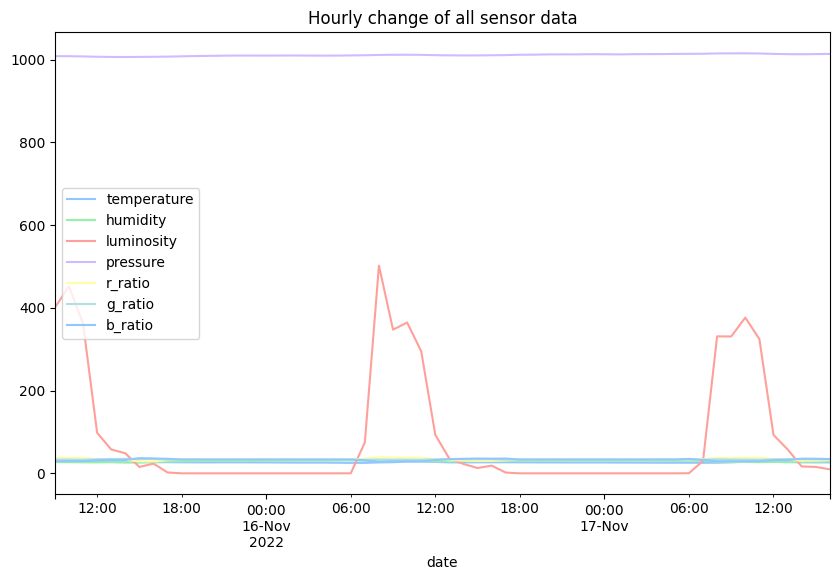

In [55]:
#  Plot mean of the iot data per every hour 
iot_data.resample('H').mean().plot(figsize=(10,6), 
                                   title='Hourly change of all sensor data') #, 
                                #    ylim=[0,500])

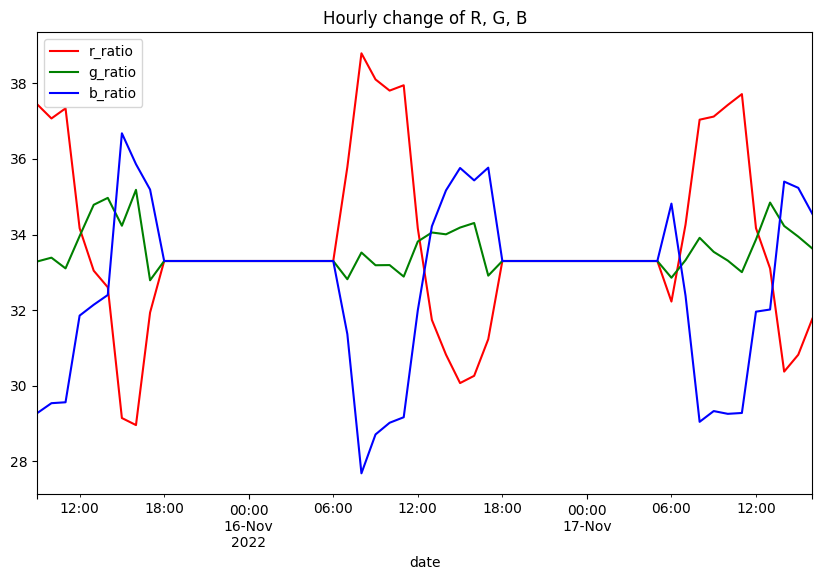

In [56]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('H').mean().plot(figsize=(10,6), 
                                    color = ['red', 'green', 'blue'],
                                    title='Hourly change of R, G, B')

## [도전하기]  하루 24 시간 동안의 R,G,B 변화 그래프를 그려보시오.

In [57]:
# Estimate the mean of iot data for every day
iot_data.resample('D').mean()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2022-11-15,27.108738,28.171850,87.777071,1008.124942,33.308227,33.712958,32.931985
2022-11-16,26.405611,30.177931,73.647536,1011.132806,33.734639,33.407858,32.800006
2022-11-17,26.380368,29.034697,97.763220,1013.968785,33.984779,33.540644,32.426135


In [58]:
iot_data.resample('D').mean().shape, iot_data.resample('D').mean().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2022-11-15 to 2022-11-17
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3 non-null      float64
 1   humidity     3 non-null      float64
 2   luminosity   3 non-null      float64
 3   pressure     3 non-null      float64
 4   r_ratio      3 non-null      float64
 5   g_ratio      3 non-null      float64
 6   b_ratio      3 non-null      float64
dtypes: float64(7)
memory usage: 192.0 bytes


((3, 7), None)

In [59]:
iot_data_day=iot_data.resample('D').mean()
iot_data_day.head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2022-11-15,27.108738,28.171850,87.777071,1008.124942,33.308227,33.712958,32.931985
2022-11-16,26.405611,30.177931,73.647536,1011.132806,33.734639,33.407858,32.800006
2022-11-17,26.380368,29.034697,97.763220,1013.968785,33.984779,33.540644,32.426135


In [60]:
iot_data_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2022-11-15 to 2022-11-17
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3 non-null      float64
 1   humidity     3 non-null      float64
 2   luminosity   3 non-null      float64
 3   pressure     3 non-null      float64
 4   r_ratio      3 non-null      float64
 5   g_ratio      3 non-null      float64
 6   b_ratio      3 non-null      float64
dtypes: float64(7)
memory usage: 192.0 bytes


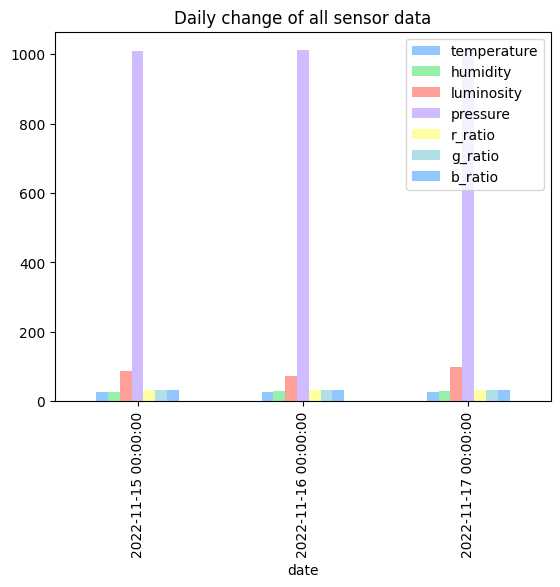

In [61]:
#  Plot mean of the iot data per every day
iot_data.resample('D').mean().plot(kind='bar', #marker='o', ms=6, figsize=(12,6), 
                                   title='Daily change of all sensor data')

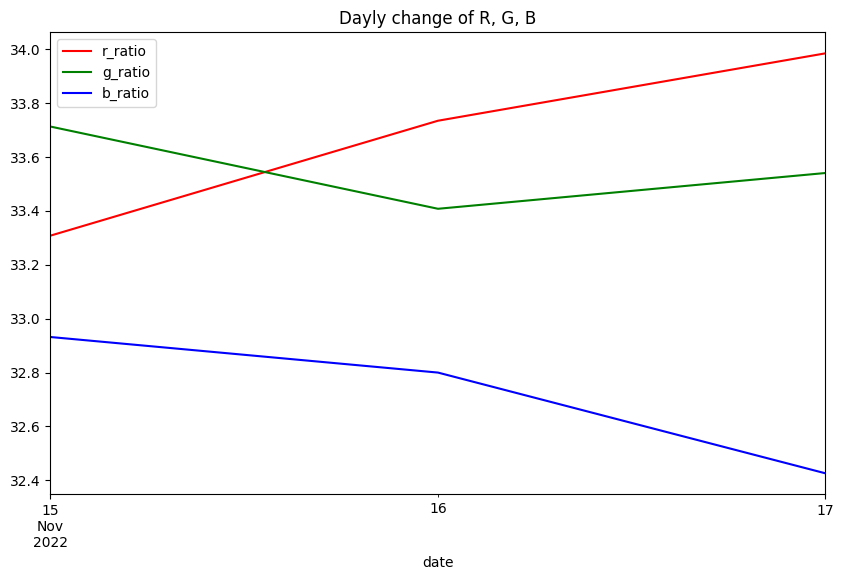

In [62]:
#  Plot mean of the iot data per every day
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('D').mean().plot(figsize=(10,6), 
                                    color = ['r','g','b'], #marker='o', ms=6, 
                                    title='Dayly change of R, G, B')

## 위의 그래프를 파이 그래프로 그려보시오.

In [63]:
#  Plot mean of the iot data per every day
# df.plot.pie(subplots=True, figsize=(6, 3))
iot_rgb = iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('D').mean()
iot_rgb.head()


,r_ratio,g_ratio,b_ratio
date,,,
2022-11-15,33.308227,33.712958,32.931985
2022-11-16,33.734639,33.407858,32.800006
2022-11-17,33.984779,33.540644,32.426135


In [64]:
iot_rgb.iloc[0],iot_rgb.iloc[1]

(r_ratio    33.308227
 g_ratio    33.712958
 b_ratio    32.931985
 Name: 2022-11-15 00:00:00, dtype: float64, r_ratio    33.734639
 g_ratio    33.407858
 b_ratio    32.800006
 Name: 2022-11-16 00:00:00, dtype: float64)

In [65]:
iot_rgb.index, len(iot_rgb.index)

(DatetimeIndex(['2022-11-15', '2022-11-16', '2022-11-17'], dtype='datetime64[ns]', name='date', freq='D'),
 3)

In [66]:
# Convert timestamp to date string
iot_rgb.index[0].strftime('%Y-%m-%d')

'2022-11-15'

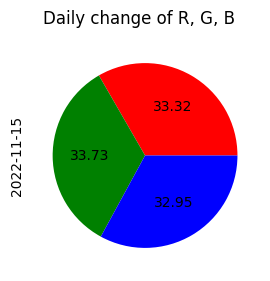

In [67]:
iot_rgb.iloc[0].plot.pie(subplots=True, figsize=(5,3), 
                         colors = ['red', 'green', 'blue'], labeldistance=None, 
                         autopct='%.2f', 
                         title='Daily change of R, G, B')
plt.ylabel(iot_rgb.index[0].strftime('%Y-%m-%d'))
plt.show()

## Weekly graph

In [68]:
# Estimate the mean of iot data for every week
iot_data.resample('W').mean()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2022-11-20,26.585181,29.306957,84.522742,1011.169714,33.695042,33.528197,32.724774


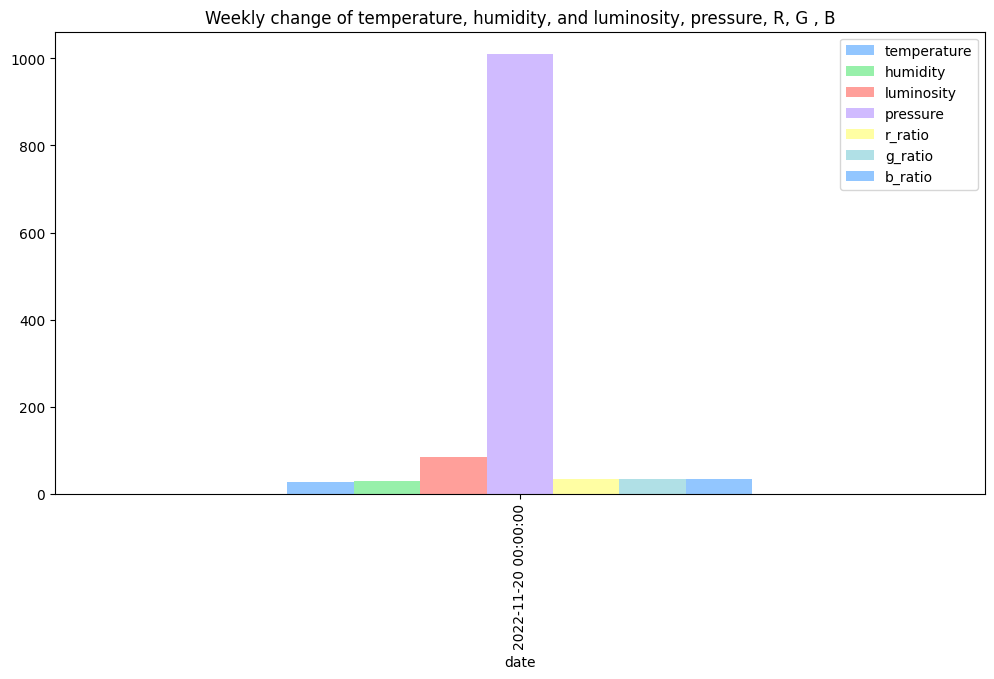

In [69]:
#  Plot mean of the iot data per every week
iot_data.resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature, humidity, and luminosity, pressure, R, G , B')

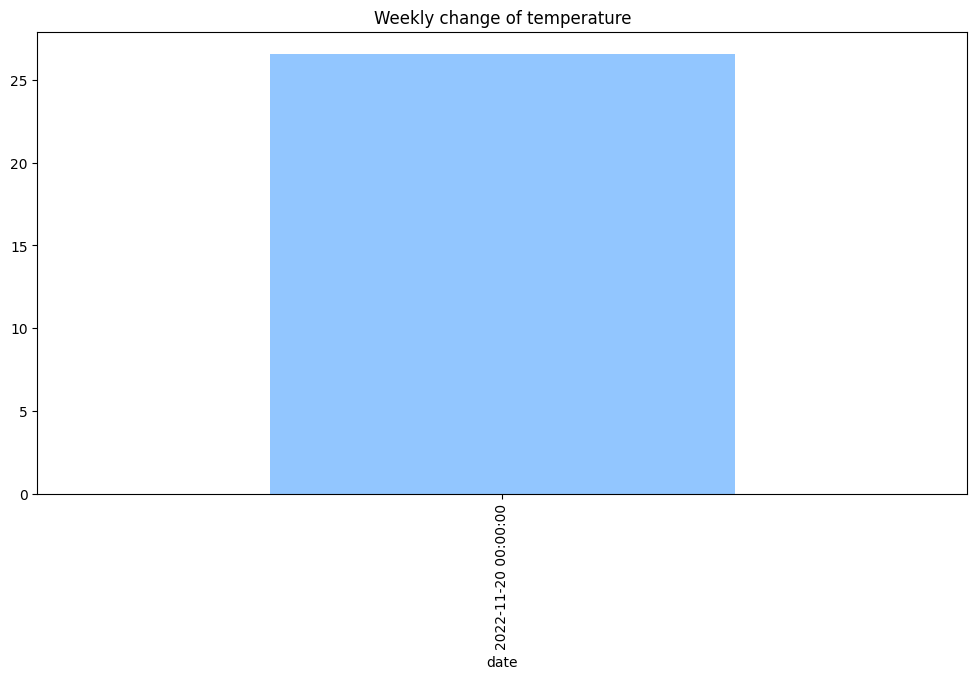

In [70]:
#  Plot mean of the iot data per every week
iot_data['temperature'].resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature')

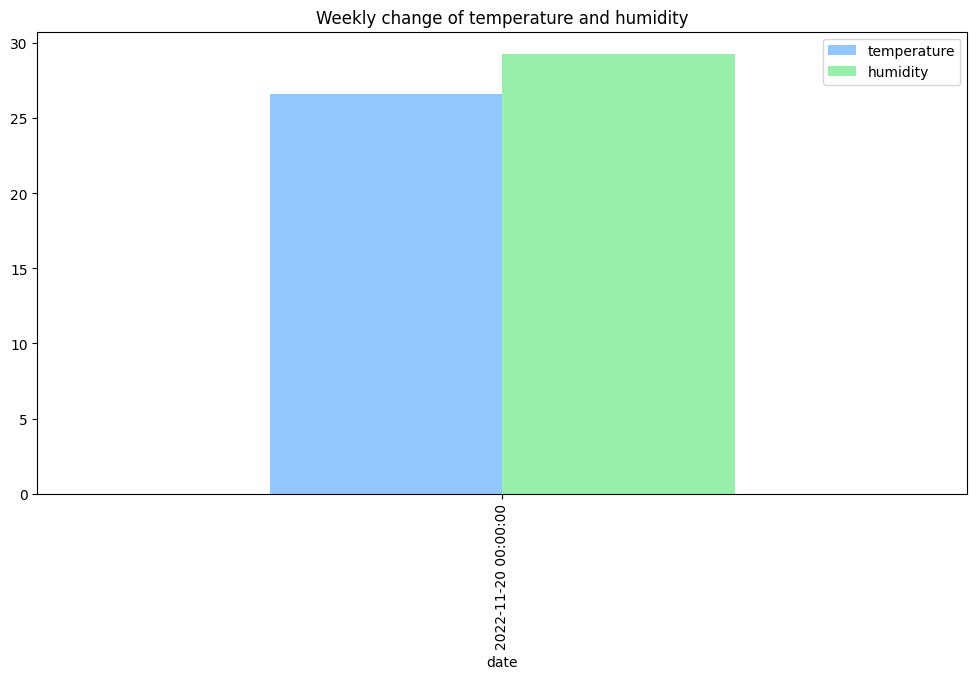

In [71]:
#  Plot mean of the iot data per every week
iot_data[['temperature','humidity']].resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature and humidity')

# [도전] 다중 파이 그래프

### 다중 파이 그래프
- https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

In [72]:
iot_rgb.shape,iot_rgb.index.size

((3, 3), 3)

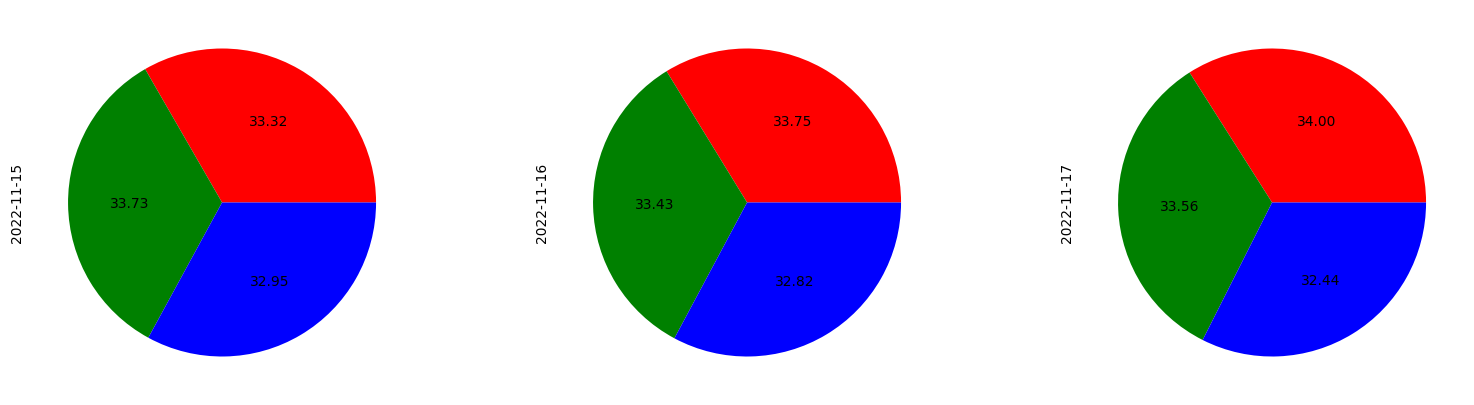

In [73]:
fig, axs = plt.subplots(nrows=1, ncols=iot_rgb.index.size, figsize=(20,5))

fig.subplots_adjust(hspace=0.5, wspace=0.05)

for row in range(iot_rgb.index.size):
    fig.add_subplot(axs[row] )
    plt.pie(iot_rgb.iloc[row],
            colors = ['red', 'green', 'blue'], labeldistance=None, 
                         autopct='%.2f')  #, labels=df.columns)
    plt.ylabel(iot_rgb.index[row].strftime('%Y-%m-%d'))
    # plt.axis('off')

### axes array 코드 참조
```
for row in ax:
    for col in row:
        col.plot(x, y)
```

In [74]:
iot_rgb.index.size

3

In [ ]:
# fig, axs = plt.subplots(nrows=(iot_rgb.index.size-1)//7+1, ncols=7, figsize=(16,16))
# # axs.set_axis_off()

# fig.subplots_adjust(hspace=0.5, wspace=0.05)
# idx=0
# for row in axs:
#     # fig.add_subplot(axs[row] )
#     # fig.add_subplot(5, 7, row+1)
#     # ax = axs[row]
#     for col in row:
#         col.pie(iot_rgb.iloc[idx],
#             colors = ['red', 'green', 'blue'], labeldistance=None, 
#                          autopct='%.2f')  #, labels=df.columns)
        
#         col.set_ylabel(iot_rgb.index[idx].strftime('%Y-%m-%d'),fontsize=12)
#         idx = idx + 1

#         if idx == iot_rgb.index.size:
#             idx = iot_rgb.index.size-1
        
#     # plt.axis('off')
#     # plt.axis('off')
#     # plt.grid(False)
# plt.show()

### animate pie chart
- https://towardsdatascience.com/learn-how-to-create-animated-graphs-in-python-fce780421afe
- https://pinkwink.kr/1090

In [75]:
iot_rgb.columns,iot_rgb.shape

(Index(['r_ratio', 'g_ratio', 'b_ratio'], dtype='object'), (3, 3))

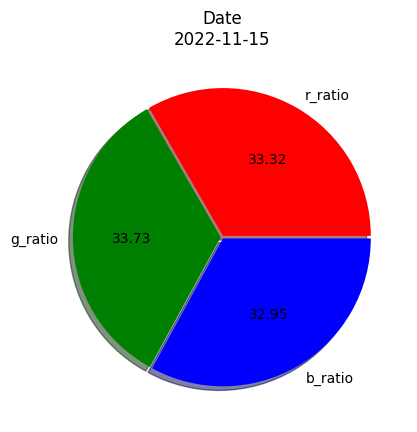

In [76]:
fig,ax = plt.subplots()
explode=[0.01,0.01,0.01] #pop out each slice from the pie
def getmepie(i):
    iv = min(i, len(iot_rgb.index)-1)
    # def absolute_value(val): #turn % back to a number
    #     a  = np.round(val/100.*df1.head(i).max().sum(), 0)
    #     return int(a)
    ax.clear()
    plot = iot_rgb.iloc[iv].plot.pie(y=iot_rgb.columns, autopct='%.2f', label='',explode = explode, colors=['r','g','b'], shadow = True)
    plot.set_title('Date\n' + str(iot_rgb.index[iv].strftime('%Y-%m-%d')), fontsize=12)

# import matplotlib.animation as ani
animator = animation.FuncAnimation(fig, getmepie, interval = 200)
# plt.show()
rc('animation', html='html5')
animator

## 와, Great!